# Get maps of the stellar population properties derived from spatially resolved SED fitting

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

## Construct the maps of properties from the collection of fitting results of all spatial bins

In [2]:
from piXedfit.piXedfit_fitting import maps_parameters

fits_binmap = "pixbin_fluxmap.fits"
hdu = fits.open(fits_binmap)
nbins = int(hdu[0].header['NBINS'])
hdu.close()

bin_ids = []
name_sampler_fits = []
for ii in range(0,nbins):
    bin_ids.append(ii)
    name = "mcmc_bin%d.fits" % (ii+1)
    name_sampler_fits.append(name)

fits_fluxmap = "fluxmap.fits"
name_out_fits = "maps_properties.fits"
maps_parameters(fits_binmap, bin_ids, name_sampler_fits, fits_fluxmap=fits_fluxmap, refband_SFR=8, 
                refband_SM=14, refband_Mdust=20, name_out_fits=name_out_fits)

'maps_properties.fits'

## Get the maps data from the output FITS file

In [3]:
maps = fits.open("maps_properties.fits")
maps.info()

# get the galaxy's region
gal_region = maps['galaxy_region'].data

Filename: maps_properties.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  GALAXY_REGION    1 ImageHDU         8   (145, 145)   float64   
  2  BIN-LOGZSOL-P16    1 ImageHDU         8   (145, 145)   float64   
  3  BIN-LOGZSOL-P50    1 ImageHDU         8   (145, 145)   float64   
  4  BIN-LOGZSOL-P84    1 ImageHDU         8   (145, 145)   float64   
  5  BIN-LOG_TAU-P16    1 ImageHDU         8   (145, 145)   float64   
  6  BIN-LOG_TAU-P50    1 ImageHDU         8   (145, 145)   float64   
  7  BIN-LOG_TAU-P84    1 ImageHDU         8   (145, 145)   float64   
  8  BIN-LOG_AGE-P16    1 ImageHDU         8   (145, 145)   float64   
  9  BIN-LOG_AGE-P50    1 ImageHDU         8   (145, 145)   float64   
 10  BIN-LOG_AGE-P84    1 ImageHDU         8   (145, 145)   float64   
 11  BIN-DUST_INDEX-P16    1 ImageHDU         8   (145, 145)   float64   
 12  BIN-DUST_INDEX-P50    1 ImageHDU         8   (145, 145)   float64   


## Plot the maps of stellar population properties

In [4]:
# calculate physical size of a single pixel
from piXedfit.piXedfit_images import kpc_per_pixel

z = float(maps[0].header['gal_z'])
arcsec_per_pixel = 0.04            
kpc_per_pix = kpc_per_pixel(z,arcsec_per_pixel)
print ("kpc/pixel = %lf" % kpc_per_pix)

kpc/pixel = 0.332112


In [5]:
rows, cols = np.where(gal_region != 1) # get pixels outside the galaxy's region of interest

# stellar mass surface density
map_prop_SM = np.log10(np.power(10.0,maps['pix-log_mass-p50'].data)/kpc_per_pix/kpc_per_pix)
map_prop_SM[rows,cols] = float('nan')  

# surface density of SFR
map_SFR = np.log10(np.power(10.0,maps['pix-log_sfr-p50'].data)/kpc_per_pix/kpc_per_pix)
map_SFR[rows,cols] = float('nan') 

# Av dust attenuation
map_Av = 1.086*maps['bin-dust2-p50'].data
map_Av[rows,cols] = float('nan')

# stellar metallicity
map_logzsol  = maps['bin-logzsol-p50'].data
map_logzsol[rows,cols] = float('nan') 

# Mass-weighted age
map_mw_age  = np.power(10.0,maps['bin-log_mw_age-p50'].data)
map_mw_age[rows,cols] = float('nan') 

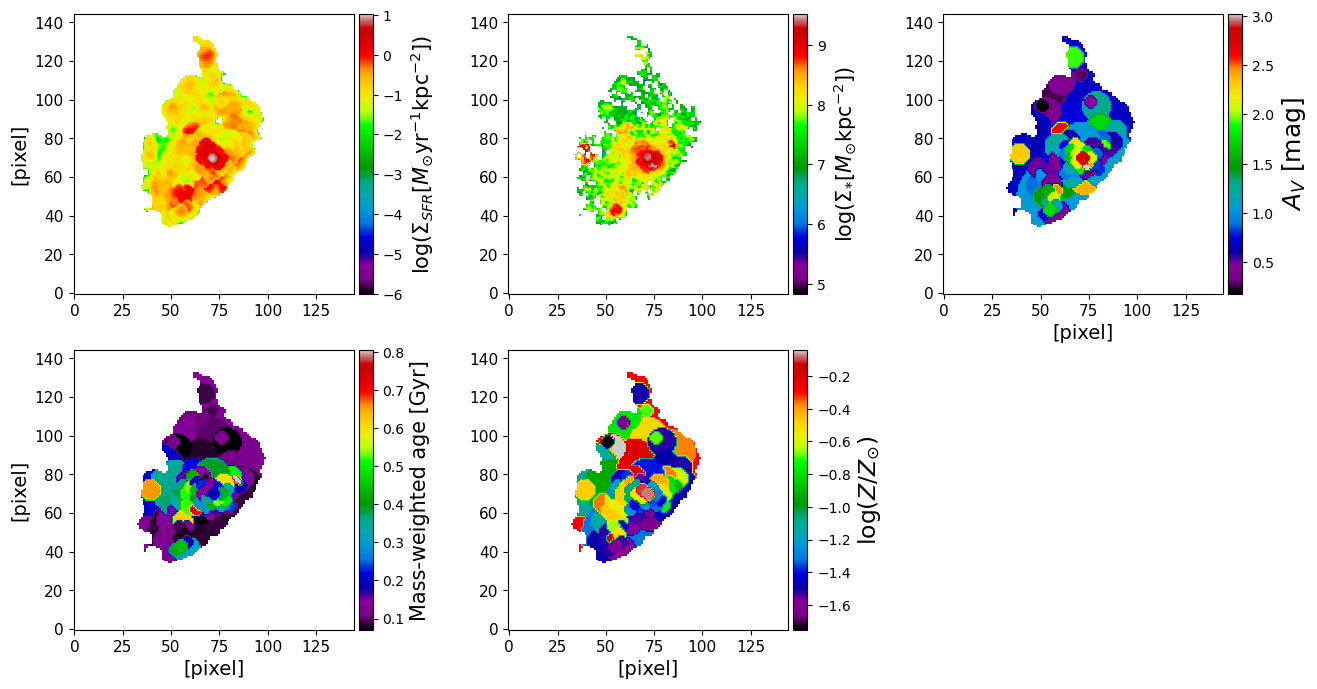

In [6]:
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig1 = plt.figure(figsize=(14,7))

###=> SFR surface density
f1 = fig1.add_subplot(2, 3, 1)
plt.ylabel('[pixel]', fontsize=14)
plt.setp(f1.get_xticklabels(), fontsize=11)
plt.setp(f1.get_yticklabels(), fontsize=11)

plt.imshow(map_SFR, origin='lower', cmap='nipy_spectral', vmin=-6.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($\Sigma_{SFR}[M_{\odot}\rm{yr}^{-1}\rm{kpc}^{-2}]$)', fontsize=15)


###=> stellar mass surface density
f1 = fig1.add_subplot(2, 3, 2)
plt.setp(f1.get_xticklabels(), fontsize=11)
plt.setp(f1.get_yticklabels(), fontsize=11)

plt.imshow(map_prop_SM, origin='lower', cmap='nipy_spectral')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($\Sigma_{*}[M_{\odot}\rm{kpc}^{-2}]$)', fontsize=15)

###=> AV dust attenuation
f1 = fig1.add_subplot(2, 3, 3)
plt.xlabel('[pixel]', fontsize=14)
plt.setp(f1.get_xticklabels(), fontsize=11)
plt.setp(f1.get_yticklabels(), fontsize=11)

plt.imshow(map_Av, origin='lower', cmap='nipy_spectral')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$A_{V}$ [mag]', fontsize=18)

### mass-weighted age
f1 = fig1.add_subplot(2, 3, 4)
plt.xlabel('[pixel]', fontsize=14)
plt.ylabel('[pixel]', fontsize=14)
plt.setp(f1.get_xticklabels(), fontsize=11)
plt.setp(f1.get_yticklabels(), fontsize=11)

plt.imshow(map_mw_age, origin='lower', cmap='nipy_spectral')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label('Mass-weighted age [Gyr]', fontsize=15)

### stellar metallicity
f1 = fig1.add_subplot(2, 3, 5)
plt.xlabel('[pixel]', fontsize=14)
plt.setp(f1.get_xticklabels(), fontsize=11)
plt.setp(f1.get_yticklabels(), fontsize=11)

plt.imshow(map_logzsol, origin='lower', cmap='nipy_spectral')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($Z/Z_{\odot}$)', fontsize=17)


plt.subplots_adjust(left=0.07, right=0.95, bottom=0.1, top=0.98, hspace=0.2, wspace=0.2)
plt.savefig('maps_properties.png')